In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
# from sklearn.
# from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv(r"C:\Users\vvagh\OneDrive - Indian Institute of Science Education and Research Bhopal\Documents\IITM Stuff\diploma-LittleBeasty\MLP project\used_cars.csv")
data

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Make_Acura,...,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,Origin_Asia,Origin_Europe,Origin_USA,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36945,3.5,6.0,265,17,23,4451,106,189,1,...,0,0,0,0,1,0,0,1,0,0
1,23820,2.0,4.0,200,24,31,2778,101,172,1,...,1,0,0,0,1,0,0,0,1,0
2,26990,2.4,4.0,200,22,29,3230,105,183,1,...,1,0,0,0,1,0,0,0,1,0
3,33195,3.2,6.0,270,20,28,3575,108,186,1,...,1,0,0,0,1,0,0,0,1,0
4,43755,3.5,6.0,225,18,24,3880,115,197,1,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,40565,2.4,5.0,197,21,28,3450,105,186,0,...,1,0,0,0,0,1,0,0,1,0
422,42565,2.3,5.0,242,20,26,3450,105,186,0,...,1,0,0,0,0,1,0,0,1,0
423,45210,2.9,6.0,268,19,26,3653,110,190,0,...,1,0,0,0,0,1,0,0,1,0
424,26135,1.9,4.0,170,22,29,2822,101,180,0,...,0,0,0,1,0,1,0,0,1,0


In [3]:
data.isna().sum().unique()
# no nulls

array([0])

In [4]:
target=data['MSRP']
df=data.drop(['MSRP'],axis=1,inplace=True)
X_train,X_test,y_train,y_test=tts(data,target,test_size=0.3,random_state=1)

In [5]:
bagging = BaggingRegressor(random_state=1)
random_forest = RandomForestRegressor(random_state=1)
gradient_boosting = GradientBoostingRegressor(random_state=1)
ada_boost = AdaBoostRegressor(random_state=1)

# Train models
bagging.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
ada_boost.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

In [6]:
score = bagging.score(X_test, y_test)
print(score)

0.7920350771420581


In [7]:
# random forest score
score = random_forest.score(X_test, y_test)
print(score)

0.8357860452427686


In [8]:
# gradient boosting score
score = gradient_boosting.score(X_test, y_test)
print(score)

0.8269560664489509


In [9]:
# score using ada boost
score = ada_boost.score(X_test, y_test)
print(score)

0.6985440740897503


In [10]:
# grid search cv for ada boost
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.5, 1, 2]
}

# Initialize AdaBoostRegressor with random_state=1
ada_boost = AdaBoostRegressor(random_state=1)

# Perform GridSearchCV
grid_search = GridSearchCV(ada_boost, param_grid, cv=4)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Compute the score on the test set
score = best_model.score(X_test, y_test)
print(score)

0.7092011324154075


In [11]:
grid_search.best_params_

{'learning_rate': 2, 'n_estimators': 500}

In [2]:
from sklearn.feature_extraction import DictVectorizer, FeatureHasher
data =[{'age': 4, 'height':96.0},
{'age': 1, 'height':73.9},
{'age': 3, 'height':88.9},
{'age': 2, 'height':81.6}]
dv = DictVectorizer(sparse=False)
dv1=DictVectorizer(sparse=True)
new_data=dv.fit_transform(data)
sparse=dv1.fit_transform(data)

In [3]:
new_data,sparse

(array([[ 4. , 96. ],
        [ 1. , 73.9],
        [ 3. , 88.9],
        [ 2. , 81.6]]),
 <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 8 stored elements and shape (4, 2)>)

In [5]:
fh=FeatureHasher()
hashed=fh.fit_transform(data)
hashed.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
fh1=FeatureHasher(input_type='dict')
hashed1=fh1.fit_transform(data)
hashed1.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
import numpy as np
np.unique(hashed1.toarray())

array([ 0. ,  1. ,  2. ,  3. ,  4. , 73.9, 81.6, 88.9, 96. ])

In [18]:
hash = np.array(hashed1.toarray())
np.unique(hash[0])

array([ 0.,  4., 96.])

In [19]:
hash.shape

(4, 1048576)

The shape (4, 1048576) of the hash map returned by FeatureHasher means:

4 rows: There are 4 data points in your input (data list). Each dictionary in the list represents one data point (or sample), so there are 4 rows.

1048576 columns: The FeatureHasher maps the feature names and values into a space of size 2^20 (1,048,576). This large number of columns is because FeatureHasher uses a hashing mechanism to assign features to a fixed-size feature space. The default n_features is 2^20 (1,048,576), meaning it hashes all features into this many possible bins.

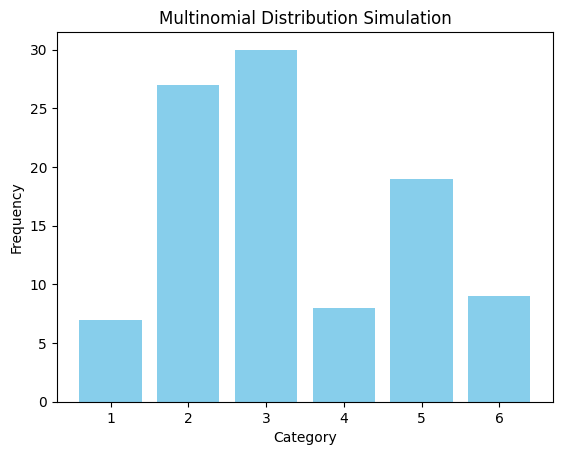

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_trials = 100  # Number of trials
p = [0.1, 0.2, 0.3, 0.1, 0.2, 0.1]  # Probabilities for each category (6 categories)

# Simulating multinomial distribution
outcome = np.random.multinomial(n_trials, p)

# Plotting the outcome
categories = np.arange(1, len(p) + 1)  # Categories (1 to 6)
plt.bar(categories, outcome, color='skyblue')

# Labeling the graph
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Multinomial Distribution Simulation')
plt.xticks(categories)  # Show category numbers on x-axis
plt.show()


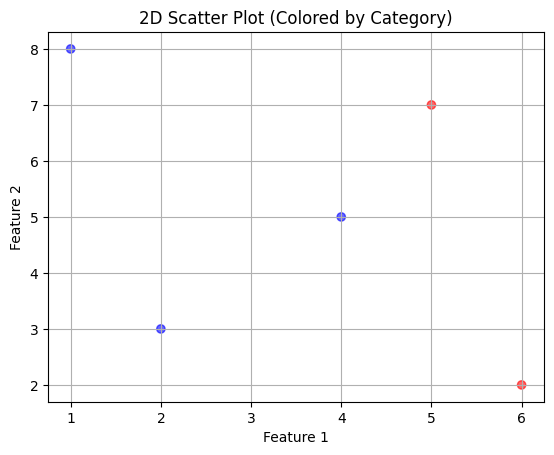

In [1]:
import matplotlib.pyplot as plt

# Example data: two features and a target
features = [(2, 3), (5, 7), (1, 8), (6, 2), (4, 5)]
targets = [0, 1, 0, 1, 0]

# Convert features to x and y
x, y = zip(*features)

# Create a scatter plot, color by category
plt.scatter(x, y, c=targets, cmap='bwr', alpha=0.6)

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Scatter Plot (Colored by Category)')
plt.grid(True)
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

# Training data
X_train = [[0, 0], [2, 1.43], [4, 2.86], [6, 4.29]]
y_train = [0, 1, 2, 3]

# Create and fit the model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Get the intercept and coefficients
intercept = reg.intercept_
coef = reg.coef_

# Display the equation
print(f"The equation of the model is: y = {intercept:.2f} + {coef[0]:.2f} * x1 + {coef[1]:.2f} * x2")


The equation of the model is: y = -0.00 + 0.33 * x1 + 0.24 * x2


In [8]:
from sklearn.linear_model import Perceptron
X=[[0,0],[0,1],[1,0],[1,1]]
y=[0,0,0,1]
perceptron=Perceptron()
perceptron.fit(X,y)
# printing the weight vector
print(perceptron.coef_) #this gives the transpose of the weight vector
# printing the bias
print(perceptron.intercept_)

[[2. 2.]]
[-2.]


In [9]:
perceptron.predict([[1,1]])

array([1])

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [4]:
import pandas as pd
df=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())

In [6]:
df.shape

(4, 9)

In [7]:
df

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1
